# Self Organizing Map

## Install MiniSom Package

In [2]:
!pip install MiniSom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for MiniSom: filename=MiniSom-2.3.2-py3-none-any.whl size=10663 sha256=a234dbfe94127d270296825934b603dd59f605920fe8ed989d912eded946ae06
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\33\10\ee\2e1ae4e4be61602ed52450c251772c7c46cc77b7e479f9cde4
Successfully built MiniSom


### Importing the libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [4]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [5]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [6]:
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X) #fit_transform , fit is used top get values min and max and transform is used to fit the data on these parameters

In [8]:
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

## Training the SOM


In [9]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
# x=10, y=10 is for grrid size
#  input_len= 15 is for number of features
# sigma= 1.0 is the radius of centroids
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualizing the results


High MID's or more distant neurons are outliers which not follow the rules(fraud) or are the outliers
Low MID's follow the rules

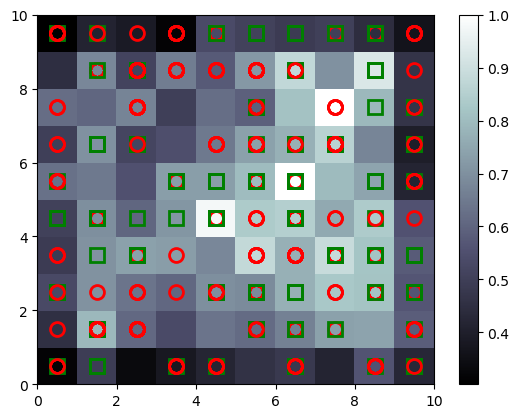

In [10]:
from pylab import bone, pcolor, colorbar, plot, show
bone()    #it is used to initialize the window 
pcolor(som.distance_map().T)
# distance_map() returns all mean interneuron distances(MID's) in one matrix, .T is used for transpose
colorbar()   # its a legend to show high or low MID

# marker's for fraud who got approval
markers = ['o', 's'] # circle and square
colors = ['r', 'g']
for i, x in enumerate(X): # in enumerate i is all index's of dataset and X will that row vector
    w = som.winner(x)  ## we get the winning node for each customer
    plot(w[0] + 0.5,  # to put at centre 0.5 is added
         w[1] + 0.5,  # w[0] is the x co=ordinate of winning node,w[1] is the y co=ordinate of winning node(lower left corner  of winning node)
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [16]:
mappings = som.win_map(X)  # dictionary of all the mappings from  winning nodes to customers
                           #(basically group or clusters of the winning node)
frauds = np.concatenate((mappings[(7,7)], mappings[(4,4)], mappings[(6,5)]), axis = 0)
# mappings[(1,1)], mappings[(4,1)] we have to mannualy check the co-ordinates of the outliers winning nodes from the map
# mappings[(1,1)] (1,1) means x co-ordinate 1,y co-ordinate 1 if of the left corner of box
#  np.concatenate is used to concat both the outliers or concat both winning nodes of frauds and get all the fraud list's together from the map
frauds = sc.inverse_transform(frauds)


## Printing the Fraunch Clients

In [17]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15662854
15638983
15623210
15570508
15790254
15768600
15748552
15757467
15815443
15748432
15771856
15696287
15808386
15698749
15764841
15729718
15786539
15773776
15791769
15571121
15682576
15642391
15598802
15708714
15635244
15648876
15679394
15581700
15629133
15604963
